# Imports

In [1]:
import numpy as np
from utility import Plotter
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from solver.DiscreteFrechet import calculate_discrete_frechet
from solver.FreeSpaceWeak import FreeSpaceWeak
from solver.FreeSpaceContinuous import FreeSpaceContinuous

from utility.FreeSpace import FreeSpace
from utility.Plotter import plotfs_pq, plot_curves, plot_freespace, read_curves, render_file_freespace

from utility.FreeSpace import POINT_PER_CELL
from utility.Animation import animate_solution

### Load Points

In [2]:
P, Q = read_curves()

In [ ]:
# Create an interactive plot of epsilon, marker_p, marker_q, and length and freespace
render_file_freespace()

## Calculating Epsilon

In [4]:
discrete_eps = calculate_discrete_frechet(P, Q)
print("Discrete Frechet distance: ", discrete_eps)

Discrete Frechet distance:  4.4386838209654


In [5]:
# weak_frechet
weak_frechet = FreeSpaceWeak(P, Q)
weak_eps = weak_frechet.compute_minimum_distance()
print("Weak Frechet distance: ", float(weak_eps))
weak_eps 

Weak Frechet distance:  4.4222301342092045


117021*sqrt(27353)/4376480

In [6]:
continuous_frechet = FreeSpaceContinuous(P, Q)
continuous_eps = continuous_frechet.calculate_distance()
print("Continuous Frechet distance: ", continuous_eps)

Continuous Frechet distance:  4.422607421875


# Visualizations

## Base Graph

c:\Users\Samsepi0l\Documents\repos\Frechet-distance-visualizer\utility\Plotter.py:33: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  ax_.legend((P_line, Q_line), ('P', 'Q'))
C:\Temp\ipykernel_22532\2170531897.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


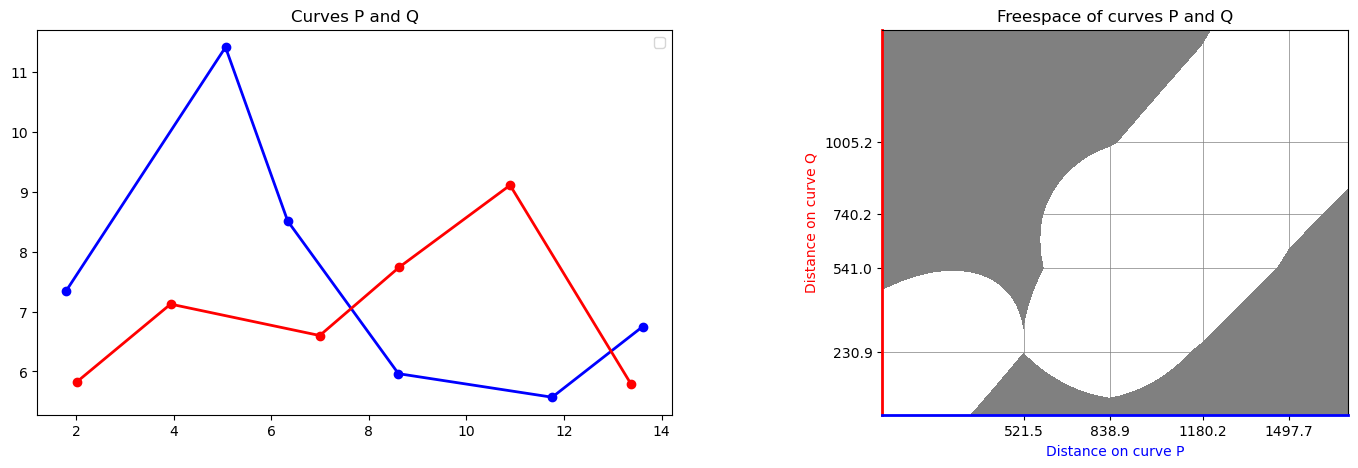

In [7]:
fig, axs = plt.subplots(1, 2)
plot_curves(P, Q, axs[0])
plot_freespace(P, Q, discrete_eps, axs[1])
fig.show()

## 3d Graph

In [ ]:
eps_grid = FreeSpace(P, Q).compute_freespace()
x_dist = P.parametric_distances[-1]
xx = np.linspace(0, x_dist, int(100*x_dist))
y_dist = Q.parametric_distances[-1]
yy = np.linspace(0, y_dist, int(100*y_dist))

c_min = np.min(eps_grid)
c_max = np.max(eps_grid)
c_sz = c_max - c_min/100

camera = dict(
      up=dict(x=0, y=0, z=1),
      center=dict(x=0, y=0, z=0),
      eye=dict(x=0,y=0,z=3)
)

fig = go.Figure(data=[go.Surface(z=eps_grid, x=xx, y=yy,opacity=0.5,
                                 contours={"z": {"show": True, "start": c_min, "end": c_max, "size": 1}})], )

fig.add_trace(go.Surface(z=np.ones(eps_grid.shape)*discrete_eps, x=xx, y=yy, opacity=0.5,colorscale='Viridis'))

# set axis labels
fig.update_layout(title='Freespace plot in 3D', scene=dict(xaxis_title='Points on curve P',yaxis_title='Points on curve Q',zaxis_title='$L_2$ Norm'), autosize=False, scene_camera=camera, width=600, height=800, margin = dict(l=65, r=50, b=65, t=90))

fig.show()

# Animated Solution

In [98]:
weak_eps = float(weak_eps)
discrete_eps, weak_eps, continuous_eps

(4.4386838209654, 4.4222301342092045, 4.422607421875)

### Discrete Frechet Distance

In [9]:
#Discrete Frechet
animate_solution(P, Q, discrete_eps)

c:\Users\Samsepi0l\Documents\repos\Frechet-distance-visualizer\utility\Plotter.py:33: UserWarning:

Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries



### Weak Frechet Distance

In [10]:
#Weak Frechet
animate_solution(P, Q, weak_eps)

### Continuous Frechet Distance

In [ ]:
#Continuous Frechet
animate_solution(P, Q, continuous_eps)